In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')
from matplotlib import style
#sta matplotlib to inline and displays graphs below the corresponding cell.
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from mlxtend.evaluate import confusion_matrix
import nltk
from nltk.corpus import stopwords
# stopwords = stopwords.words('english')
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer #for creating Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer
import re

print("Succesfully Imported the given LIBRARIES")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Succesfully Imported the given LIBRARIES


In [5]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Krish Naik ( NLP )/Fake News Detection/Fake-News-Classifier-master/fake-news/train.csv')
df.head()

id  ... label
0   0  ...     1
1   1  ...     0
2   2  ...     1
3   3  ...     1
4   4  ...     1

[5 rows x 5 columns]

In [6]:
df=df.iloc[:,1:]
df.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

In [7]:
df.shape

(20800, 4)

In [8]:
round(df.isnull().mean() *100,3)

title     2.683
author    9.409
text      0.188
label     0.000
dtype: float64

In [9]:
#either way you can find the percentage of null values
(df.isnull().sum()/len(df))*100

title     2.682692
author    9.408654
text      0.187500
label     0.000000
dtype: float64

Data set is about to classify the given message is fake(0) or real(1) based on the given text

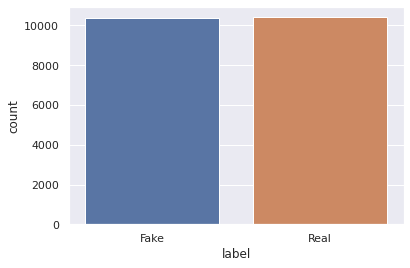

In [10]:
sns.countplot(x='label',data=df)
plt.xticks(np.arange(2),["Fake","Real"])
plt.show()

In [11]:
###This shows that data is balanced

In [12]:
df=df.dropna()
df.head(10)

title  ... label
0   House Dem Aide: We Didn’t Even See Comey’s Let...  ...     1
1   FLYNN: Hillary Clinton, Big Woman on Campus - ...  ...     0
2                   Why the Truth Might Get You Fired  ...     1
3   15 Civilians Killed In Single US Airstrike Hav...  ...     1
4   Iranian woman jailed for fictional unpublished...  ...     1
5   Jackie Mason: Hollywood Would Love Trump if He...  ...     0
7   Benoît Hamon Wins French Socialist Party’s Pre...  ...     0
9   A Back-Channel Plan for Ukraine and Russia, Co...  ...     0
10  Obama’s Organizing for Action Partners with So...  ...     0
11  BBC Comedy Sketch "Real Housewives of ISIS" Ca...  ...     0

[10 rows x 4 columns]

In [13]:
# X=df.drop('label',axis=1)
y=df['label']

In [14]:
# messages=X.copy()

In [15]:
# messages.reset_index(inplace=True,drop=True)


In [16]:
df.reset_index(drop=True,inplace=True)
df.head(10)

title  ... label
0  House Dem Aide: We Didn’t Even See Comey’s Let...  ...     1
1  FLYNN: Hillary Clinton, Big Woman on Campus - ...  ...     0
2                  Why the Truth Might Get You Fired  ...     1
3  15 Civilians Killed In Single US Airstrike Hav...  ...     1
4  Iranian woman jailed for fictional unpublished...  ...     1
5  Jackie Mason: Hollywood Would Love Trump if He...  ...     0
6  Benoît Hamon Wins French Socialist Party’s Pre...  ...     0
7  A Back-Channel Plan for Ukraine and Russia, Co...  ...     0
8  Obama’s Organizing for Action Partners with So...  ...     0
9  BBC Comedy Sketch "Real Housewives of ISIS" Ca...  ...     0

[10 rows x 4 columns]

In [17]:
nltk.download('stopwords')
# stopwords=stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# def process_text(x):
#   corpus_test = []
#   for i in range(0, len(x)):
#     review = re.sub('[^a-zA-Z]', ' ', x['text'][i])
#     review = review.lower()
#     review = review.split()
# #     print(review)
# #     review=[ps.stem(word) for word in review if not word in all_stopwords]
#     review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
#     review = ' '.join(review)
#     corpus_test.append(review)
        
#   return corpus_test

In [19]:
lemmatizer=WordNetLemmatizer()

In [20]:
lemmatizer=WordNetLemmatizer()
# messages=df.copy()
ps = PorterStemmer()
corpus = []
lemmatizer=WordNetLemmatizer()
ps = PorterStemmer()

corpus = []
for i in range(0, len(df)):
  print(i)
  review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
  review = review.lower()
  review = review.split()
#     print(review)
#     review=[ps.stem(word) for word in review if not word in all_stopwords]
  review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)

Streaming output truncated to the last 5000 lines.
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
13443
1

In [21]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel case know anthoni weiner sext teenag appar littl thing fact matter c

In [22]:
cv=CountVectorizer(max_features=5000,ngram_range=(1, 2))
X=cv.fit_transform(corpus).toarray()


In [23]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

print(y_test.shape)

(12799, 5000)
(12799,)
(5486, 5000)
(5486,)


In [25]:
cv.get_feature_names()[:20]

['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access']

In [26]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 2),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [27]:

count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_df.head()

aaron  abandon  abc  abe  abedin  ...  zero  zika  zionist  zone  zu
0      0        0    0    0       0  ...     0     0        0     0   0
1      0        0    1    0       3  ...     0     0        0     0   0
2      0        0    0    0       3  ...     0     0        0     0   0
3      0        0    0    0       0  ...     0     0        0     0   0
4      0        0    0    0       0  ...     0     0        0     0   0

[5 rows x 5000 columns]

In [28]:
from sklearn.linear_model import LinearRegression,LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred=lg.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [30]:
accuracy_score(y_test,y_pred)

0.9502369668246445

In [31]:
#plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.YlOrRd):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="right",
                 color="White" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


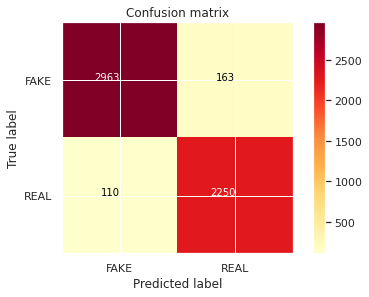

In [32]:
import itertools
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [33]:
test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Krish Naik ( NLP )/Fake News Detection/Fake-News-Classifier-master/fake-news/train.csv')

In [34]:
test.head()

id  ... label
0   0  ...     1
1   1  ...     0
2   2  ...     1
3   3  ...     1
4   4  ...     1

[5 rows x 5 columns]

In [35]:
test.shape

(20800, 5)

In [36]:
test.isnull().mean()*100

id        0.000000
title     2.682692
author    9.408654
text      0.187500
label     0.000000
dtype: float64

In [37]:
test.dropna(inplace=True)
test.reset_index(inplace=True,drop=True)

In [38]:
import nltk
nltk.download('wordnet')

def process_text(x):
  corpus_test = []
  for i in range(0, len(x)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', x['text'][i])
    review = review.lower()
    review = review.split()
#     print(review)
#     review=[ps.stem(word) for word in review if not word in all_stopwords]
    review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus_test.append(review)
        
  return corpus_test

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
corpus_test=process_text(test)

Streaming output truncated to the last 5000 lines.
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
13443
1

In [43]:
corpus_test

['house dem aide even see comey letter jason chaffetz tweeted darrell lucus october subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative common license apology keith olbermann doubt worst person world week fbi director james comey according house democratic aide look like also know second worst person well turn comey sent infamous letter announcing fbi looking email may related hillary clinton email server ranking democrat relevant committee hear comey found via tweet one republican committee chairman know comey notified republican chairman democratic ranking member house intelligence judiciary oversight committee agency reviewing email recently discovered order see contained classified information long letter went oversight committee chairman jason chaffetz set political world ablaze tweet fbi dir informed fbi learned existence email appear pertinent investigation case reopened jason chaffetz jasoninthehouse october course know case comey 

In [44]:
test=cv.transform(corpus_test).toarray()

In [45]:
y_pred_test=lg.predict(test)
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [1]:
np.where(y_pred==0,"Fake","Real")

NameError: ignored